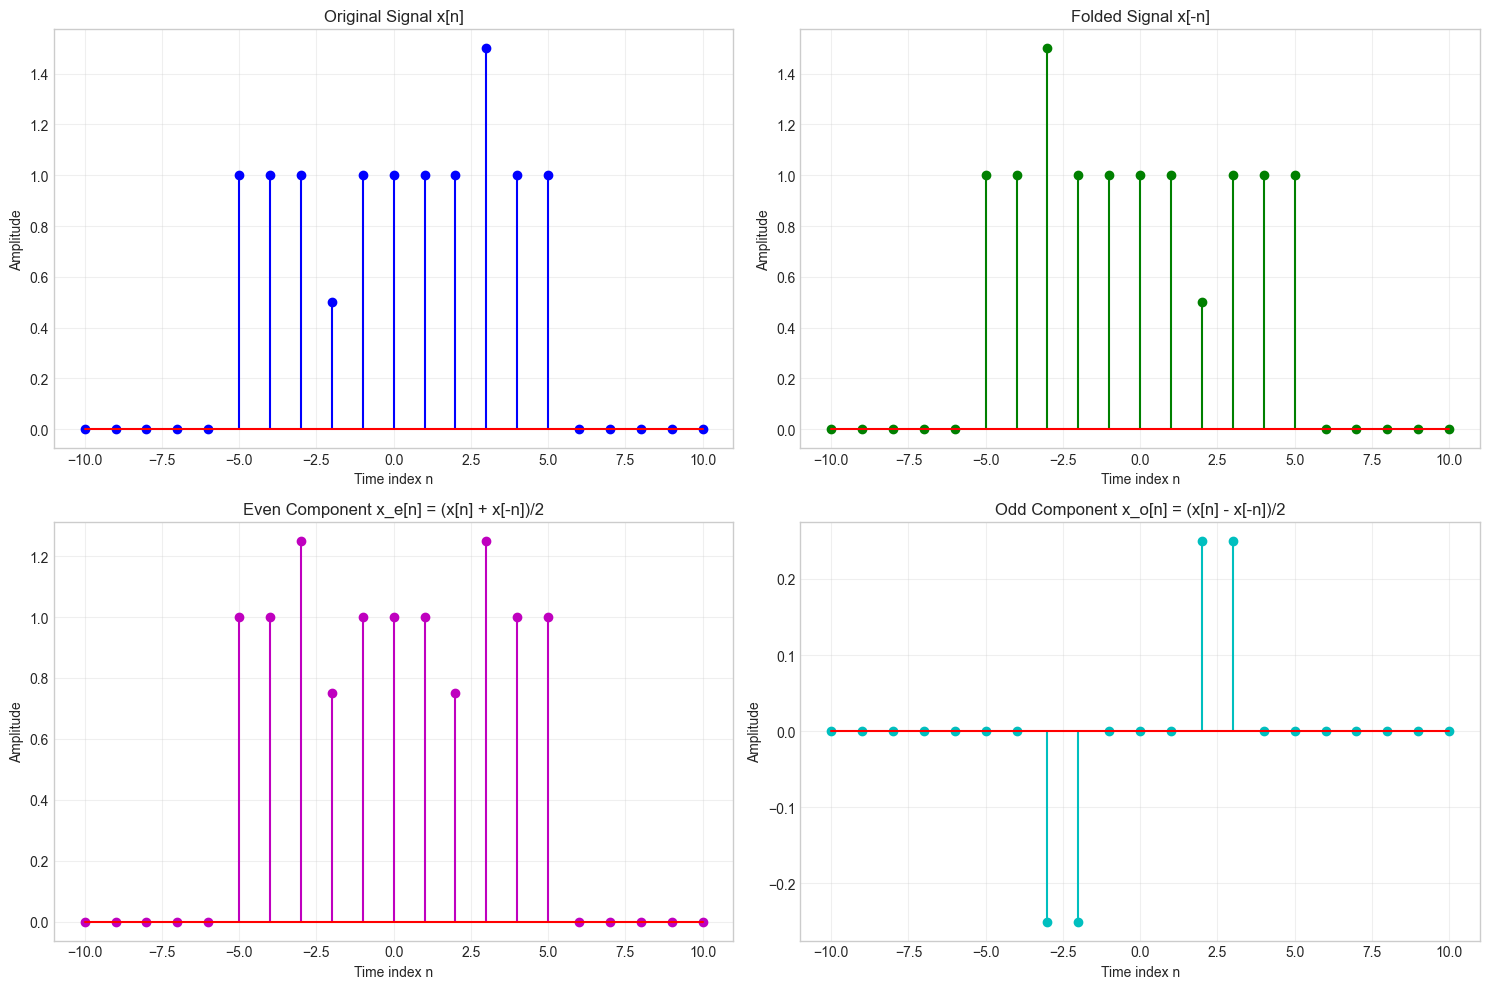

Maximum reconstruction error: 0.00e+00
Even component symmetry check: True
Odd component symmetry check: True


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure for all our plots
plt.figure(figsize=(15, 10))

# Define our signal (using a similar example to the video)
n = np.arange(-10, 11)  # Time indices from -10 to 10
x = np.zeros_like(n, dtype=float)

# Create a non-symmetric signal similar to the video example
x[(n >= -5) & (n <= 5)] = 1.0 
x[n == 3] = 1.5  
x[n == -2] = 0.5  

# Plot the original signal
plt.subplot(2, 2, 1)
plt.stem(n, x, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title('Original Signal x[n]')
plt.xlabel('Time index n')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)

# Create the folded signal x[-n]
x_folded = x[::-1]  # Reverse the array

# Plot the folded signal
plt.subplot(2, 2, 2)
plt.stem(n, x_folded, linefmt='g-', markerfmt='go', basefmt='r-')
plt.title('Folded Signal x[-n]')
plt.xlabel('Time index n')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)

# Calculate the even component: x_e[n] = (x[n] + x[-n])/2
x_even = (x + x_folded) / 2

# Plot the even component
plt.subplot(2, 2, 3)
plt.stem(n, x_even, linefmt='m-', markerfmt='mo', basefmt='r-')
plt.title('Even Component x_e[n] = (x[n] + x[-n])/2')
plt.xlabel('Time index n')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)

# Calculate the odd component: x_o[n] = (x[n] - x[-n])/2
x_odd = (x - x_folded) / 2

# Plot the odd component
plt.subplot(2, 2, 4)
plt.stem(n, x_odd, linefmt='c-', markerfmt='co', basefmt='r-')
plt.title('Odd Component x_o[n] = (x[n] - x[-n])/2')
plt.xlabel('Time index n')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Verify the decomposition by reconstructing the original signal
x_reconstructed = x_even + x_odd

# Check if the reconstruction is perfect
reconstruction_error = np.max(np.abs(x - x_reconstructed))
print(f"Maximum reconstruction error: {reconstruction_error:.2e}")

# Additional verification: Check properties of even and odd signals
print(f"Even component symmetry check: {np.allclose(x_even, x_even[::-1])}")
print(f"Odd component symmetry check: {np.allclose(x_odd, -x_odd[::-1])}")